# Jesse Livermore Trading Strategy: (Back Test 2020-2025)

**UI Suggestions:** Build a UI that includes three key components (1) a chat-bot responds to user's questions with Jesse Livermore' investment insights (2) a dashboard to allow users to
- i. allow user to back-test the trading performance for any stock
- ii. allow user to select the time range they want to back-test the Livermore's strategy
- iii. visualize the return dynamics, using the trading model I wrote for you you below.

Jesse Livermore, often considered one of the greatest traders of all time, was known for his trend-following, breakout-oriented philosophy. He believed in:
- Trading in the direction of the trend.
- Entering on breakouts (especially from consolidations).
- Pyramiding into winners.
- Cutting losses quickly.
- Staying out of the market when unclear.

Here’s a simple trend-following strategy that echoes those ideas using moving averages and breakout levels:

[*********************100%***********************]  1 of 1 completed


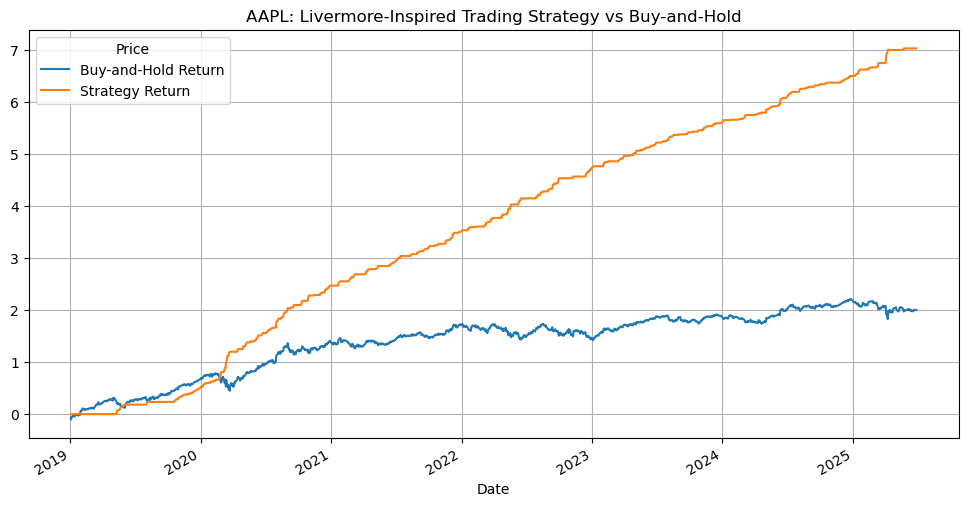

Buy-and-Hold Agg. Return: 200.17%
Livermore Strategy Agg. Return: 702.80%


In [7]:
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

start_date = datetime(2019,1,1)
end_date = datetime(2025,6,30)

# Download data
# Magnificiant 7: META, TSLA, NVDA, AAPL, MSFT, AMZN, GOOGL
stock_symbol = 'AAPL' 
stock = yf.download(stock_symbol, start_date, end_date)
df = stock.xs(stock_symbol, axis = 1, level = 'Ticker')

# Calculate moving averages
SMA_window_1 = 50
SMA_window_2 = 200
df[f'{SMA_window_1}MA'] = df['Close'].rolling(window=SMA_window_1).mean()
df[f'{SMA_window_2}MA'] = df['Close'].rolling(window=SMA_window_2).mean()

# Define breakout level (previous 20-day high)
break_out_window = 20
df[f'{break_out_window}High'] = df['Close'].rolling(window=break_out_window).max()
df[f'{break_out_window}Low'] = df['Close'].rolling(window=break_out_window).min()

# Entry/Exit signals
df['Position'] = 0

# Buy when:
# - Price breaks above past 20-day high
# - Price is above both 50MA and 200MA
df.loc[
    (df['Close'] > df['20High'].shift(1)) &
    (df['Close'] > df['50MA']) &
    (df['Close'] > df['200MA']),
    'Position'
] = 1

# Sell when:
# - Price drops below past 20-day low
df.loc[df['Close'] < df['20Low'].shift(1), 'Position'] = -1

# Forward fill positions
df['Position'] = df['Position'].fillna(0)

# Calculate returns
df['Buy-and-Hold Return'] = df['Close'].pct_change()
df['Strategy Return'] = df['Buy-and-Hold Return'] * df['Position']

# Plot results
df[['Buy-and-Hold Return', 'Strategy Return']].cumsum().plot(figsize=(12,6))
plt.title(f"{stock_symbol}: Livermore-Inspired Trading Strategy vs Buy-and-Hold")
plt.grid(True)
plt.show()

# Print PnL summary
strategy_return = df['Strategy Return'].cumsum().iloc[-1]
buyhold_return = df['Buy-and-Hold Return'].cumsum().iloc[-1]
print(f'Buy-and-Hold Agg. Return: {buyhold_return:.2%}')
print(f'Livermore Strategy Agg. Return: {strategy_return:.2%}')

**Key Livermore Principles Embedded:**
- Breakout Entry: Buy only when price breaks out above resistance (20-day high).
- Trend Confirmation: Only trade when price is above both 50 and 200-day MAs.
- Exit: Get out when trend reverses (price breaks below 20-day low).
- Position Management: No averaging down, and trades only in the direction of strength.